# 3 Виконання

## 3.1 Обрати та завантажити дані

### Імпортуємо бібліотеки, визначимо налаштування для pandas, завантажимо датафрейм

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.options.display.max_colwidth = 60
pd.options.display.max_rows = 7
pd.options.display.max_columns = 7
pd.options.display.width = 600

path_criminal_statistic = 'data/90-2002_.xlsx' 
df = pd.read_excel(path_criminal_statistic)
df.columns = [
    'year', 'crimes', 'accused', 'adm', 'civils', 'fires']
df = df.set_index('year')
obj_cols = df.select_dtypes(['object'])
df[obj_cols.columns] = obj_cols.apply(lambda x: x.str.replace(' ', ''))
df = df.astype(str).apply(
    lambda x: x.str.replace(',', '.')).astype(float)
df

,crimes,accused,adm,civils,fires
year,,,,,
1990,369809.0,104199.0,6515.90,379.20,NaN
1991,405516.0,108553.0,7841.50,358.50,NaN
1992,480478.0,115260.0,9723.90,364.00,NaN
...,...,...,...,...,...
2015,5651827.0,947986.0,1984.66,947.26,820166.0
2016,5926047.0,762176.0,2183.66,751.26,753236.0
2017,5239117.0,768046.0,2885.36,729.96,857246.0


*Завантажений датафрейм*

## 3.2 Знайти математичне сподівання, медіану, моду, дисперсію, середньоквадратичне відхилення

### Математичне сподівання – сума всіх значень, поділена на їхню кількість.

In [3]:
df.mean()

crimes     1.368354e+06
accused    2.760651e+05
adm        8.531505e+03
civils     9.917086e+02
fires      1.775765e+05
dtype: float64

*Математичне сподівання*

### Медіана – це середина відсортованого набору даних.

In [4]:
df.median()

crimes     549007.50
accused    185573.00
adm          7759.70
civils        963.91
fires       49838.00
dtype: float64

*Медіана*

### Мода – це найчастіше значення, що зустрічається.

In [5]:
df.mode()

,crimes,accused,adm,civils,fires
0,369809.0,104199.0,1984.66,358.5,36814.0
1,390162.0,108553.0,2183.66,364.0,37596.0
2,405516.0,115260.0,2657.06,379.2,40237.0
...,...,...,...,...,...
25,5291395.0,768046.0,14950.90,1593.8,NaN
26,5651827.0,947986.0,15997.70,1680.2,NaN
27,5926047.0,1021706.0,22400.60,2193.3,NaN


*Мода*

### Дисперсія – це середнє арифметичне квадратів різниці кожного значення з математичним сподіванням.

In [6]:
df.var()

crimes     3.562555e+12
accused    6.538051e+10
adm        2.123088e+07
civils     2.290414e+05
fires      8.168601e+10
dtype: float64

*Дисперсія*

### Середньоквадратичне відхилення – це дисперсія під коренем

In [7]:
df.var() ** 0.5

crimes     1.887473e+06
accused    2.556961e+05
adm        4.607698e+03
civils     4.785827e+02
fires      2.858076e+05
dtype: float64

*Середньоквадратичне відхилення*

## 3.3 Візуалізувати завантажені дані за допомогою гістограми

### Візуалізуємо дані за допомогою методу plot та оберемо тип "bar" для відображення гістограми.

<AxesSubplot: xlabel='year'>

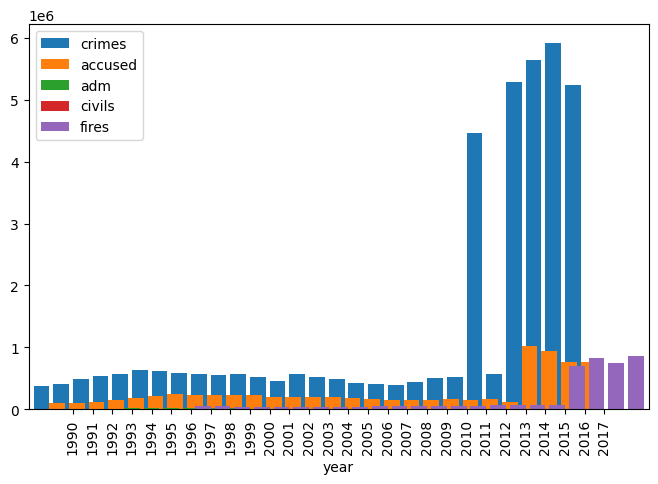

In [8]:
df.plot(kind='bar', figsize=(8, 5), width=4)

*Статистика злочинів*

## 3.4 Проробити всі дії з пункту про Series та DataFrame

### Створюємо Series зі значеннями кількості злочинів на рік.

In [9]:

crimes = pd.Series([ 369809.,  405516.,  480478.,  539299.,  572147.,  641860.,
        617262.,  589208.,  575982.,  558716.,  567795.,  514597.,
        460389.,  566350.,  527812.,  491754.,  428149.,  408170.,
        390162.,  439459.,  505371.,  520218., 4471474.,  563560.,
       5291395., 5651827., 5926047., 5239117.])
crimes

0      369809.0
1      405516.0
2      480478.0
        ...    
25    5651827.0
26    5926047.0
27    5239117.0
Length: 28, dtype: float64

*Кількість злочинів на рік*

### Отримуємо другий запис.

In [10]:
crimes[1]

405516.0

*Другий запис*

### Рахуємо кількість записів.

In [11]:
crimes.count()

28

*Кількість записів*

### Рахуємо математичне сподівання

In [12]:
crimes.mean()

1368354.392857143

*Математичне сподівання*

### Рахуємо найменше значення

In [13]:
crimes.min()

369809.0

*Найменше значення*

### Рахуємо найбільше значення

In [14]:
crimes.max()

5926047.0

*Найбільше значення*

### Рахуємо середньоквадратичне відхилення

In [15]:
crimes.std()

1887473.2573186466

*Cередньоквадратичне відхилення*

### Отримуємо статистику набору даних (кількість, математичне сподівання, середньоквадратичне відхилення, найменше та найбільше значення, квантилі)

In [16]:
df.describe()

,crimes,accused,adm,civils,fires
count,2.800000e+01,2.800000e+01,28.000000,28.000000,23.000000
mean,1.368354e+06,2.760651e+05,8531.505000,991.708571,177576.521739
std,1.887473e+06,2.556961e+05,4607.697643,478.582688,285807.644386
...,...,...,...,...,...
50%,5.490075e+05,1.855730e+05,7759.700000,963.910000,49838.000000
75%,5.962215e+05,2.313268e+05,10041.675000,1289.225000,63733.500000
max,5.926047e+06,1.021706e+06,22400.600000,2193.300000,857246.000000


*Cтатистика набору даних*

### Створення Series зі словника, де ключі - роки, значення - кількість злочинів

In [17]:
crimes = pd.Series(
    {
        1990: 369809.0,
        1991: 405516.0,
        1992: 480478.0,
        1993: 539299.0,
        1994: 572147.0,
        1995: 641860.0,
        1996: 617262.0,
        1997: 589208.0,
        1998: 575982.0,
        1999: 558716.0,
        2000: 567795.0,
        2001: 514597.0,
        2002: 460389.0,
        2003: 566350.0,
        2004: 527812.0,
        2005: 491754.0,
        2006: 428149.0,
        2007: 408170.0,
        2008: 390162.0,
        2009: 439459.0,
        2010: 505371.0,
        2011: 520218.0,
        2012: 4471474.0,
        2013: 563560.0,
        2014: 5291395.0,
        2015: 5651827.0,
        2016: 5926047.0,
        2017: 5239117.0
    }
)
crimes

1990     369809.0
1991     405516.0
1992     480478.0
          ...    
2015    5651827.0
2016    5926047.0
2017    5239117.0
Length: 28, dtype: float64

*Series зі словника*

### Отримуємо кількість злочинів за 1992 рік

In [18]:
crimes[1992]

480478.0

*Кількість злочинів за 1992 рік*

### Отримуємо тип даних

In [19]:
crimes.dtype

dtype('float64')

*Тип даних*

### Отримуємо значення набору даних

In [20]:
crimes.values

array([ 369809.,  405516.,  480478.,  539299.,  572147.,  641860.,
        617262.,  589208.,  575982.,  558716.,  567795.,  514597.,
        460389.,  566350.,  527812.,  491754.,  428149.,  408170.,
        390162.,  439459.,  505371.,  520218., 4471474.,  563560.,
       5291395., 5651827., 5926047., 5239117.])

*Значення набору даних*

### Створення DataFrame зі словника

In [21]:
dd = pd.DataFrame(
  {
    1990: [369809.0, 104199.0, 6515.9, 379.2, float('nan')],
    1991: [405516.0, 108553.0, 7841.5, 358.5, float('nan')],
    1992: [480478.0, 115260.0, 9723.9, 364.0, float('nan')],
    1993: [539299.0, 152878.0, 11767.1, 407.7, float('nan')],
    1994: [572147.0, 174959.0, 15997.7, 399.2, float('nan')],
    1995: [641860.0, 212915.0, 22400.6, 453.3, 47875.0],
    1996: [617262.0, 242124.0, 14950.9, 550.1, 46824.0],
    1997: [589208.0, 237790.0, 14232.1, 599.8, 42507.0],
    1998: [575982.0, 232598.0, 13330.7, 744.2, 41294.0],
    1999: [558716.0, 222239.0, 10542.0, 772.6, 40237.0],
    2000: [567795.0, 230903.0, 9395.4, 911.4, 37596.0],
    2001: [514597.0, 202609.0, 6384.1, 1057.0, 36814.0],
    2002: [460389.0, 194212.0, 6472.4, 1166.4, 41794.0],
    2003: [566350.0, 201081.0, 7097.3, 1259.3, 40374.0],
    2004: [527812.0, 204794.0, 7013.7, 1457.5, 49654.0],
    2005: [491754.0, 176934.0, 6370.3, 1116.2, 53751.0],
    2006: [428149.0, 160865.0, 7677.9, 1322.3, 51432.0],
    2007: [408170.0, 152772.0, 8867.5, 1499.0, 55708.0],
    2008: [390162.0, 146858.0, 9874.9, 1680.2, 49838.0],
    2009: [439459.0, 146383.0, 8280.5, 1541.8, 48998.0],
    2010: [505371.0, 168774.0, 8854.1, 2193.3, 64743.0],
    2011: [520218.0, 154356.0, 6709.9, 1593.8, 62724.0],
    2012: [4471474.0, 162881.0, 4621.1, 1278.2, 73405.0],
    2013: [563560.0, 122973.0, 4249.9, 1253.8, 62118.0],
    2014: [5291395.0, 1021706.0, 2657.06, 980.56, 705926.0],
    2015: [5651827.0, 947986.0, 1984.66, 947.26, 820166.0],
    2016: [5926047.0, 762176.0, 2183.66, 751.26, 753236.0],
    2017: [5239117.0, 768046.0, 2885.36, 729.96, 857246.0]
  }
).T
dd

,0,1,2,3,4
1990,369809.0,104199.0,6515.90,379.20,NaN
1991,405516.0,108553.0,7841.50,358.50,NaN
1992,480478.0,115260.0,9723.90,364.00,NaN
...,...,...,...,...,...
2015,5651827.0,947986.0,1984.66,947.26,820166.0
2016,5926047.0,762176.0,2183.66,751.26,753236.0
2017,5239117.0,768046.0,2885.36,729.96,857246.0


*DataFrame зі словника*

### Отримаємо дані про злочини за роки незалежності, використовуючи стовпець

In [22]:
dd.columns = ['crimes', 'accused', 'adm', 'civils', 'fires']
dd.crimes

1990     369809.0
1991     405516.0
1992     480478.0
          ...    
2015    5651827.0
2016    5926047.0
2017    5239117.0
Name: crimes, Length: 28, dtype: float64

*Дані про злочини за роки незалежності*

### Отримаємо дані про злочини за 1992 рік, використовуючи явний індекс

In [23]:
dd.loc[1992]

crimes     480478.0
accused    115260.0
adm          9723.9
civils        364.0
fires           NaN
Name: 1992, dtype: float64

*Дані про злочини за 1992 рік, використовуючи явний індекс*

### Отримаємо дані про злочини за 1992 рік, використовуючи неявний індекс

In [24]:
dd.iloc[1]

crimes     405516.0
accused    108553.0
adm          7841.5
civils        358.5
fires           NaN
Name: 1991, dtype: float64

*Дані про злочини за 1992 рік, використовуючи неявний індекс*

###  Отримуємо дані про злочини з 1992 до 1995 для явних індексів, де для явних останній вказаний індекс включається

In [25]:
dd.loc[1992:1995]

,crimes,accused,adm,civils,fires
1992,480478.0,115260.0,9723.9,364.0,NaN
1993,539299.0,152878.0,11767.1,407.7,NaN
1994,572147.0,174959.0,15997.7,399.2,NaN
1995,641860.0,212915.0,22400.6,453.3,47875.0


*Дані про злочини з 1992 до 1995 для явних індексів*

###  Отримуємо дані про злочини з 1992 до 1994 для НЕявних індексів, де для НЕявних останній вказаний індекс НЕ включається

In [26]:
dd.iloc[2:5]

,crimes,accused,adm,civils,fires
1992,480478.0,115260.0,9723.9,364.0,NaN
1993,539299.0,152878.0,11767.1,407.7,NaN
1994,572147.0,174959.0,15997.7,399.2,NaN


*Дані про злочини з 1992 до 1995 для неявних індексів*

### Отримуємо дані про злочини з 1992 І з 1995 для явних індексів

In [27]:
dd.loc[[1992, 1995]]

,crimes,accused,adm,civils,fires
1992,480478.0,115260.0,9723.9,364.0,NaN
1995,641860.0,212915.0,22400.6,453.3,47875.0


*Дані про злочини з 1992 І з 1995 для явних індексів*

### Отримуємо дані про злочини з 1992 І з 1995 для неявних індексів

In [28]:
dd.iloc[[2, 5]]

,crimes,accused,adm,civils,fires
1992,480478.0,115260.0,9723.9,364.0,NaN
1995,641860.0,212915.0,22400.6,453.3,47875.0


*Дані про злочини з 1992 І з 1995 для неявних індексів*

### Отримуємо дані про злочини явних ідексів та стовпців

In [29]:
dd.loc[1992:1995, 'crimes':'accused']

,crimes,accused
1992,480478.0,115260.0
1993,539299.0,152878.0
1994,572147.0,174959.0
1995,641860.0,212915.0


*Дані про злочини явних ідексів та стовпців*

### Отримуємо дані про злочини неявних ідексів та стовпців

In [30]:
dd.iloc[2:5, 0:2]

,crimes,accused
1992,480478.0,115260.0
1993,539299.0,152878.0
1994,572147.0,174959.0


*Дані про злочини неявних ідексів та стовпців*

### Відображаємо рядки, де кількість злочинів > 550 000

In [31]:
dd[dd.crimes > 550000]

,crimes,accused,adm,civils,fires
1994,572147.0,174959.0,15997.70,399.20,NaN
1995,641860.0,212915.0,22400.60,453.30,47875.0
1996,617262.0,242124.0,14950.90,550.10,46824.0
...,...,...,...,...,...
2015,5651827.0,947986.0,1984.66,947.26,820166.0
2016,5926047.0,762176.0,2183.66,751.26,753236.0
2017,5239117.0,768046.0,2885.36,729.96,857246.0


*Рядки, де кількість злочинів > 550 000*

### Відображаємо рядки, де кількість злочинів > 550 000 і < 600 000

In [32]:
dd[(dd.crimes > 550000) & (dd.crimes < 600000)]

,crimes,accused,adm,civils,fires
1994,572147.0,174959.0,15997.7,399.2,NaN
1997,589208.0,237790.0,14232.1,599.8,42507.0
1998,575982.0,232598.0,13330.7,744.2,41294.0
1999,558716.0,222239.0,10542.0,772.6,40237.0
2000,567795.0,230903.0,9395.4,911.4,37596.0
2003,566350.0,201081.0,7097.3,1259.3,40374.0
2013,563560.0,122973.0,4249.9,1253.8,62118.0


*Рядки, де кількість злочинів > 550 000 і < 600 000*

### Отримуємо кількість злочинів за 1992 рік явно

In [33]:
dd.at[1992, 'crimes']

480478.0

*Кількість злочинів за 1992 рік явно*

### Отримуємо кількість злочинів за 1992 рік неявно

In [34]:
dd.iat[2, 0]

480478.0

*Кількість злочинів за 1992 рік неявно*

### Змінюємо значення кількості злочинів за 1992 явно

In [35]:
dd.at[1992, 'crimes'] = 11
dd.at[1992, 'crimes']

11.0

*Зміна значення кількості злочинів за 1992 явно*

### Змінюємо значення кількостізлочинів за 1992 НЕявно

In [36]:
dd.iat[2, 0] = 22
dd.iat[2, 0]

22.0

*Зміна значення кількості злочинів за 1992 неявно*

### Інформацію про набір даних( кількість рядків, математичне сподівання, середньоквадратичне відхилення, найменше та найбільше значення, квантилі )

In [37]:
dd.describe()

,crimes,accused,adm,civils,fires
count,2.800000e+01,2.800000e+01,28.000000,28.000000,23.000000
mean,1.351195e+06,2.760651e+05,8531.505000,991.708571,177576.521739
std,1.897999e+06,2.556961e+05,4607.697643,478.582688,285807.644386
...,...,...,...,...,...
50%,5.490075e+05,1.855730e+05,7759.700000,963.910000,49838.000000
75%,5.962215e+05,2.313268e+05,10041.675000,1289.225000,63733.500000
max,5.926047e+06,1.021706e+06,22400.600000,2193.300000,857246.000000


*Інформація про набір даних*

### Зміна точності виведення дійсних чисел

In [38]:
pd.options.display.precision = 2
dd.describe()

,crimes,accused,adm,civils,fires
count,2.80e+01,2.80e+01,28.00,28.00,23.00
mean,1.35e+06,2.76e+05,8531.50,991.71,177576.52
std,1.90e+06,2.56e+05,4607.70,478.58,285807.64
...,...,...,...,...,...
50%,5.49e+05,1.86e+05,7759.70,963.91,49838.00
75%,5.96e+05,2.31e+05,10041.67,1289.22,63733.50
max,5.93e+06,1.02e+06,22400.60,2193.30,857246.00


*Зміна точності виведення дійсних чисел*

### Знайдемо математичне сподівання для кожного стовпчика

In [39]:
dd.mean()

crimes     1.35e+06
accused    2.76e+05
adm        8.53e+03
civils     9.92e+02
fires      1.78e+05
dtype: float64

*Математичне сподівання для кожного стовпчика*

### Транспонуємо набір даних

In [40]:
dd.T

,1990,1991,1992,...,2015,2016,2017
crimes,369809.0,405516.0,22.0,...,5.65e+06,5.93e+06,5.24e+06
accused,104199.0,108553.0,115260.0,...,9.48e+05,7.62e+05,7.68e+05
adm,6515.9,7841.5,9723.9,...,1.98e+03,2.18e+03,2.89e+03
civils,379.2,358.5,364.0,...,9.47e+02,7.51e+02,7.30e+02
fires,NaN,NaN,NaN,...,8.20e+05,7.53e+05,8.57e+05


*Транспонований набір даних*

### Знаходження інформації про транспонований набір даних

In [41]:
dd.T.describe()

,1990,1991,1992,...,2015,2016,2017
count,4.00,4.00,4.00,...,5.00e+00,5.00e+00,5.00e+00
mean,120225.78,130567.25,31342.47,...,1.48e+06,1.49e+06,1.37e+06
std,173052.77,189822.17,56125.31,...,2.37e+06,2.51e+06,2.20e+06
...,...,...,...,...,...,...,...
50%,55357.45,58197.25,5043.95,...,8.20e+05,7.53e+05,7.68e+05
75%,170601.50,182793.75,36107.93,...,9.48e+05,7.62e+05,8.57e+05
max,369809.00,405516.00,115260.00,...,5.65e+06,5.93e+06,5.24e+06


*Інформація про транспонований набір даних*

### Отримуємо математичне сподівання для транспонованого набору даних, де тепер значення отримаємо не по стобцях, а по роках

In [42]:
dd.T.mean()

1990    1.20e+05
1991    1.31e+05
1992    3.13e+04
          ...   
2015    1.48e+06
2016    1.49e+06
2017    1.37e+06
Length: 28, dtype: float64

*Математичне сподівання для транспонованого набору даних*

### Сортуємо набір даних за індексом за зростанням

In [43]:
dd.sort_index(ascending=True)

,crimes,accused,adm,civils,fires
1990,3.70e+05,104199.0,6515.90,379.20,NaN
1991,4.06e+05,108553.0,7841.50,358.50,NaN
1992,2.20e+01,115260.0,9723.90,364.00,NaN
...,...,...,...,...,...
2015,5.65e+06,947986.0,1984.66,947.26,820166.0
2016,5.93e+06,762176.0,2183.66,751.26,753236.0
2017,5.24e+06,768046.0,2885.36,729.96,857246.0


*Набір даних, відсортований за індексом за зростанням*

### Сортуємо набір даних за індексом за спаданням

In [44]:
dd.sort_index(ascending=False)

,crimes,accused,adm,civils,fires
2017,5.24e+06,768046.0,2885.36,729.96,857246.0
2016,5.93e+06,762176.0,2183.66,751.26,753236.0
2015,5.65e+06,947986.0,1984.66,947.26,820166.0
...,...,...,...,...,...
1992,2.20e+01,115260.0,9723.90,364.00,NaN
1991,4.06e+05,108553.0,7841.50,358.50,NaN
1990,3.70e+05,104199.0,6515.90,379.20,NaN


*Набір даних, відсортований за індексом за спаданням*

### Сортуємо стовпці за кількість скоєних злочинів

In [45]:
dd.sort_values(by='crimes', ascending=False)

,crimes,accused,adm,civils,fires
2016,5.93e+06,7.62e+05,2183.66,751.26,753236.0
2015,5.65e+06,9.48e+05,1984.66,947.26,820166.0
2014,5.29e+06,1.02e+06,2657.06,980.56,705926.0
...,...,...,...,...,...
2008,3.90e+05,1.47e+05,9874.90,1680.20,49838.0
1990,3.70e+05,1.04e+05,6515.90,379.20,NaN
1992,2.20e+01,1.15e+05,9723.90,364.00,NaN


*Стовпці, відсортовані за кількість скоєних злочинів*

### Сортуємо види порушень в транспонованому наборі даних за спаданням за 1992 рік

In [46]:
dd.T.sort_values(by=1992, ascending=False)

,1990,1991,1992,...,2015,2016,2017
accused,104199.0,108553.0,115260.0,...,9.48e+05,7.62e+05,7.68e+05
adm,6515.9,7841.5,9723.9,...,1.98e+03,2.18e+03,2.89e+03
civils,379.2,358.5,364.0,...,9.47e+02,7.51e+02,7.30e+02
crimes,369809.0,405516.0,22.0,...,5.65e+06,5.93e+06,5.24e+06
fires,NaN,NaN,NaN,...,8.20e+05,7.53e+05,8.57e+05


*Види порушень в транспонованому наборі даних, відсортовані за спаданням за 1992 рік*

### Сортуємо стовпці за кількість скоєних злочинів, де inplace=True, щоб сортування відбувалося в самому наборі даних

In [47]:
dd.sort_values(by='crimes', ascending=False, inplace=True)

*Cтовпці, відсортовані за кількість скоєних злочинів*

## 3.5 Виконати первинну обробку даних

### Виконано в пункті 3.1

## 3.6 Прочитати набір даних катастрофи «Титаніка»

## 3.7 Завантажити набір даних катастрофи «Титаніка» за URL-адресою

### Завантаження набору даних катастрофи «Титаніка»

In [48]:
titanic = pd.read_csv('https://vincentarelbundock.github.io/Rdatasets/csv/carData/TitanicSurvival.csv')
titanic

,Unnamed: 0,survived,sex,age,passengerClass
0,"Allen, Miss. Elisabeth Walton",yes,female,29.00,1st
1,"Allison, Master. Hudson Trevor",yes,male,0.92,1st
2,"Allison, Miss. Helen Loraine",no,female,2.00,1st
...,...,...,...,...,...
1306,"Zakarian, Mr. Mapriededer",no,male,26.50,3rd
1307,"Zakarian, Mr. Ortin",no,male,27.00,3rd
1308,"Zimmerman, Mr. Leo",no,male,29.00,3rd


*Дані про катастрофу*

## 3.8 Переглянути рядки  набору даних катастрофи «Титаніка»

### Встановлення точності виведення

In [49]:
pd.options.display.precision = 2
pd.options.display.precision

2

*Точність виведення*

### Отримання перших 5-ти рядків

In [50]:
titanic.head()

,Unnamed: 0,survived,sex,age,passengerClass
0,"Allen, Miss. Elisabeth Walton",yes,female,29.00,1st
1,"Allison, Master. Hudson Trevor",yes,male,0.92,1st
2,"Allison, Miss. Helen Loraine",no,female,2.00,1st
3,"Allison, Mr. Hudson Joshua Crei",no,male,30.00,1st
4,"Allison, Mrs. Hudson J C (Bessi",no,female,25.00,1st


*Перші п'ять рядків*

### Отримання останніх 5-ти рядків

In [51]:
titanic.tail()

,Unnamed: 0,survived,sex,age,passengerClass
1304,"Zabour, Miss. Hileni",no,female,14.5,3rd
1305,"Zabour, Miss. Thamine",no,female,NaN,3rd
1306,"Zakarian, Mr. Mapriededer",no,male,26.5,3rd
1307,"Zakarian, Mr. Ortin",no,male,27.0,3rd
1308,"Zimmerman, Mr. Leo",no,male,29.0,3rd


*Останні п'ять рядків*

## 3.9 Налаштувати  назви стовпців

### Встановлення назви стовпців

In [52]:
titanic.columns = ['name', 'survived', 'sex', 'age', 'class']
titanic

,name,survived,sex,age,class
0,"Allen, Miss. Elisabeth Walton",yes,female,29.00,1st
1,"Allison, Master. Hudson Trevor",yes,male,0.92,1st
2,"Allison, Miss. Helen Loraine",no,female,2.00,1st
...,...,...,...,...,...
1306,"Zakarian, Mr. Mapriededer",no,male,26.50,3rd
1307,"Zakarian, Mr. Ortin",no,male,27.00,3rd
1308,"Zimmerman, Mr. Leo",no,male,29.00,3rd


*Дані про катастрофу*

## 3.10 Провести простий аналіз даних: визначити наймолодшого пасажира, найстаршого, який був середній вік пасажирів та статистику по пасажирам які вижили. Відсортувати всіх жінок з кают 1-го класу, знайти наймолодшу та найстаршу серед них, кількість вцілілих

### Отримання наймолодшого пасажира за допомогою знаходження рядка за його індексом, знайденого за найменшим значенням

In [53]:
titanic.loc[titanic.age.idxmin()]

name        Dean, Miss. Elizabeth Gladys M
survived                               yes
sex                                 female
age                                   0.17
class                                  3rd
Name: 763, dtype: object

*Наймолодший пасажир*

### Отримання найстаршого пасажира за допомогою знаходження рядка за його індексом, знайденого за найбільшим значенням

In [54]:
titanic.loc[titanic.age.idxmax()]

name        Barkworth, Mr. Algernon Henry W
survived                                yes
sex                                    male
age                                    80.0
class                                   1st
Name: 14, dtype: object

*Найстарший пасажир*

### Знаходження середнього віку пасажирів методом mean

In [55]:
titanic.age.mean()

29.881134512434034

*Середній вік пасажирів*

### Отримання вцілілих пасажирів за допомогою маски

In [56]:
survived = titanic[titanic.survived == 'yes']
survived

,name,survived,sex,age,class
0,"Allen, Miss. Elisabeth Walton",yes,female,29.00,1st
1,"Allison, Master. Hudson Trevor",yes,male,0.92,1st
5,"Anderson, Mr. Harry",yes,male,48.00,1st
...,...,...,...,...,...
1286,"Whabee, Mrs. George Joseph (Sha",yes,female,38.00,3rd
1290,"Wilkes, Mrs. James (Ellen Needs",yes,female,47.00,3rd
1300,"Yasbeck, Mrs. Antoni (Selini Al",yes,female,15.00,3rd


*Уцілілі пасажири*

### Статистика по вцілілих пасажирах (кількість, середній вік, середньоквадратичне відхилення віку, найменший вік, найбільший та квантилі)

In [57]:
survived.describe()

,age
count,427.00
mean,28.92
std,15.06
...,...
50%,28.00
75%,38.00
max,80.00


*Статистика по вцілілих пасажирах*

### Фільтрування за статтю( жінки ) та класом ( 1ий клас )

In [58]:
first_class_women = titanic[(titanic.sex == 'female') & (titanic['class'] == '1st')]
first_class_women

,name,survived,sex,age,class
0,"Allen, Miss. Elisabeth Walton",yes,female,29.0,1st
2,"Allison, Miss. Helen Loraine",no,female,2.0,1st
4,"Allison, Mrs. Hudson J C (Bessi",no,female,25.0,1st
...,...,...,...,...,...
315,"Willard, Miss. Constance",yes,female,21.0,1st
319,"Wilson, Miss. Helen Alice",yes,female,31.0,1st
322,"Young, Miss. Marie Grice",yes,female,36.0,1st


*Жінки 1-го класу*

### Отримання наймолодшої жінки з 1-го класу

In [59]:
first_class_women.loc[first_class_women.age.idxmin()]

name        Allison, Miss. Helen Loraine
survived                              no
sex                               female
age                                  2.0
class                                1st
Name: 2, dtype: object

*Наймолодша жінка з 1-го класу*

### Отримання найстаршої жінки з 1-ого класу

In [60]:
first_class_women.loc[first_class_women.age.idxmax()]

name        Cavendish, Mrs. Tyrell William
survived                               yes
sex                                 female
age                                   76.0
class                                  1st
Name: 61, dtype: object

*Найстарша жінка з 1-го класу*

### Знайдемо кількість жінок з першого класу, що вижили

In [61]:
len(first_class_women[first_class_women.survived == 'yes'])

139

*Кількість жінок з першого класу, що вижили*

## 3.11 Побудувати гістограму віку пасажирів

### Гістограма віку матодом hist

<AxesSubplot: >

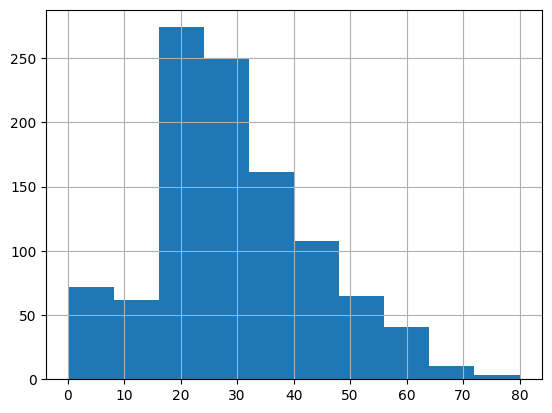

In [62]:
titanic.age.hist()

*Гістограма віку*